<a href="https://colab.research.google.com/github/jakekrafczyk/Real-Estate-Analysis/blob/main/pdf_to_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=7b3e8e8c641bde47215277cac6e3947bf0af42b63b060c00721350e8686ddea6
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [ ]:
import pandas as pd
import numpy as np
import PyPDF2
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
# open it and read it- PDF obtained from https://pittsburghpa.gov/finance/real-estate-tax-deq
pdfFileObj = open('RE_WebPublishng_10-19-2020.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [ ]:
# create page object and extract text
pageObj = pdfReader.getPage(0)
page1 = pageObj.extractText()
page1

'ACCT_NO\nOWNERS\nPROP_LOCATION\nCURRENT_DELQ\nPRIOR_DELQ\nPRIOR_DELQ\nCOMMENTS\nTAX\nTAX\nPENALTIES\n1010001C00228000100\nTOWN DEVELOPMENT INC                            \n100 FORBES AVE\n$0.00\n$2,047.17\n$0.00\n1010001C00228000200\nTOWN DEVELOPMENT INC                            \n424 STANWIX ST\n$10,290.69\n$14,443.62\n$0.00\n1010001C00228000400\nTOWN DEVELOPMENT INC                            \n424 STANWIX ST\n$0.00\n$32,735.42\n$272.79\n1010001D00117    00\n502-510 LIBERTY AVE LP \n502 LIBERTY AVE\n$23,281.50\n$0.00\n$0.00\n1010001D00144    00\nALEX I LLC \n431 MARKET ST\n$4,648.99\n$6,931.49\n$462.09\nPRIOR YEARS AT JORDAN 412-345-7960\n1010001G00151    00\nPITTSBURGH PRESS  BUILDING ASSOCIATES LP\n34 BLVD OF THE ALLIES\n$71,214.00\n$0.00\n$0.00\n1010001G00224040500\nZEGARELLI RONDA A \n151 FORT PITT BLVD UNIT 405\n$5,847.89\n$0.00\n$0.00\n1010001G00224100100\nELASH MARY \n151 FORT PITT BLVD UNIT 1001\n$7,166.27\n$0.00\n$0.00\n1010001G00224100200\nELASH MARY \n151 FORT PITT BLVD

In [ ]:
def clean_page(anypage):
  # clean headers
  anypage = anypage[91:]

  # clean out "comments" column to ensure an equal amount of value in every row 
  clean_page = anypage.replace('PRIOR YEARS AT JORDAN 412-345-7960\n','' ).replace('\n',', ')

  # clean off comma at the end
  clean_page = clean_page[:-2]

  # use split to divide into list
  page_list = clean_page.split(", ")

  # return cleaned list
  return page_list

page_list = clean_page(page1)

In [ ]:
import re
df = pd.DataFrame(columns=['ID','Owner','Address','Curr_Dlq_Tax','Prior_Dlq_Tax','Prior_Dlq_Pnlty'])

for x in page_list:
  if count < 5 and count > 0:
    clean_list.append(x.strip())
    count += 1

  elif count == 5:
    clean_list.append(x.strip())
    count += 1

    # add list as a row
    df_length = len(df)
    df.loc[df_length] = clean_list

  else:
    # reset list and counter
    count = 0
    clean_list = []

    # clean out whitespace between digits and delete the first 3 digits then add to list
    clean_list.append(re.sub(r"\s+", "", x, flags=re.UNICODE)[3:])
    count += 1

print(df.tail())
df

              ID  ... Prior_Dlq_Pnlty
32  0033M0019300  ...         $165.63
33  0033M0019800  ...           $0.00
34  0033M0029800  ...          $67.72
35  0033R0000700  ...           $0.00
36  0033S0006000  ...          $16.61

[5 rows x 6 columns]


,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty
0,0033L0013000,PARKS JESSICA JOYCE,209 QUINCY AVE,$278.61,$0.00,$0.00
1,0033L0013100,SCHUCHERT DAVID R & DONNA E (W),207 QUINCY AVE,$400.00,$512.11,$46.77
2,0033L0013500,OKOYE CLEMENT,125 QUINCY AVE,$388.05,$0.00,$0.00
3,0033L0022100,SCOTT LEGACY INVESTMENTS LLC,208 ONYX AVE,$153.24,$0.00,$0.00
4,0033L0022300,LAURE GEORGE M JR & DEBORAH (W),212 ONYX AVE,$399.00,"$4,955.28","$2,881.53"
5,0033L0022400,KAUKMAS PAUL,214 ONYX AVE,$406.96,$409.76,$28.10
6,0033L0022500,R&T INVESTS LLC,216 ONYX AVE,$398.01,$393.60,$26.24
7,0033L0023100,MARK JAMES II TRUST,302 ONYX AVE,$228.86,"$4,549.09","$3,194.80"
8,0033L0023400,IMPELL SCOTT,308 ONYX AVE,$293.53,$0.00,$0.00
9,0033L0024300,BEAM EDWARD J & NORMA J,326 ONYX AVE,$293.53,"$9,131.10","$9,780.45"


In [ ]:
# create dataframe for the cleaned pdf values, then iterate through every value in the pdf

df = pd.DataFrame(columns=['ID','Owner','Address','Curr_Dlq_Tax','Prior_Dlq_Tax','Prior_Dlq_Pnlty'])

for page_num in range(0, 416):
  pageObj = pdfReader.getPage(page_num)
  page = pageObj.extractText()

  page_list = clean_page(page)

  clean_list = []

  count = 0
  for x in page_list:
    if count < 5 and count > 0:
      clean_list.append(x.strip())
      count += 1

    elif count == 5:
      clean_list.append(x.strip())
      count += 1

      # add list as a row
      df_length = len(df)
      df.loc[df_length] = clean_list

    else:
      # reset list and counter
      count = 0
      clean_list = []

      # add entry
      clean_list.append(re.sub(r"\s+", "", x, flags=re.UNICODE)[3:])
      count += 1

df

,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty
0,0001C00228000100,TOWN DEVELOPMENT INC,100 FORBES AVE,$0.00,"$2,047.17",$0.00
1,0001C00228000200,TOWN DEVELOPMENT INC,424 STANWIX ST,"$10,290.69","$14,443.62",$0.00
2,0001C00228000400,TOWN DEVELOPMENT INC,424 STANWIX ST,$0.00,"$32,735.42",$272.79
3,0001D0011700,502-510 LIBERTY AVE LP,502 LIBERTY AVE,"$23,281.50",$0.00,$0.00
4,0001D0014400,ALEX I LLC,431 MARKET ST,"$4,648.99","$6,931.49",$462.09
...,...,...,...,...,...,...
21612,0033M0019300,MALLOY RITA A,519 GIFFIN AVE,$66.23,$418.18,$165.63
21613,0033M0019800,KACHMAR RONALD R & LYNETTE M (W),509 GIFFIN AVE,$71.21,$0.00,$0.00
21614,0033M0029800,LEDDY ROBERT N & NANCY L,910 TRANSVERSE AVE,$145.27,$406.92,$67.72
21615,0033R0000700,LOVE NICOLE,312 QUINCY AVE,$473.62,$0.00,$0.00


In [ ]:
df.loc[[2411]]
# 2411

,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty
2411,0051B0015600,VEY ROBERT G & DOLORES,5134 FRIENDSHIP AVE,2978.22,8880.81,1825.43


In [ ]:
df.to_csv('pghPAgov.csv')

In [ ]:
# import csv instead of rerunning entire notebook
import pandas as pd
import numpy as np
from google.colab import files

upload = files.upload()

Saving pghPAgov.csv to pghPAgov.csv


In [ ]:
df = pd.read_csv('pghPAgov.csv',index_col=0)
df

,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty
0,0001C00228000100,TOWN DEVELOPMENT INC,100 FORBES AVE,$0.00,"$2,047.17",$0.00
1,0001C00228000200,TOWN DEVELOPMENT INC,424 STANWIX ST,"$10,290.69","$14,443.62",$0.00
2,0001C00228000400,TOWN DEVELOPMENT INC,424 STANWIX ST,$0.00,"$32,735.42",$272.79
3,0001D0011700,502-510 LIBERTY AVE LP,502 LIBERTY AVE,"$23,281.50",$0.00,$0.00
4,0001D0014400,ALEX I LLC,431 MARKET ST,"$4,648.99","$6,931.49",$462.09
...,...,...,...,...,...,...
21612,0033M0019300,MALLOY RITA A,519 GIFFIN AVE,$66.23,$418.18,$165.63
21613,0033M0019800,KACHMAR RONALD R & LYNETTE M (W),509 GIFFIN AVE,$71.21,$0.00,$0.00
21614,0033M0029800,LEDDY ROBERT N & NANCY L,910 TRANSVERSE AVE,$145.27,$406.92,$67.72
21615,0033R0000700,LOVE NICOLE,312 QUINCY AVE,$473.62,$0.00,$0.00


In [ ]:
# convert tax numbers to floats
df['Curr_Dlq_Tax'] = df['Curr_Dlq_Tax'].replace('\$|,', '', regex=True)
df['Curr_Dlq_Tax'] = pd.to_numeric(df['Curr_Dlq_Tax'])

df['Prior_Dlq_Tax'] = df['Prior_Dlq_Tax'].replace('\$|,', '', regex=True)
df['Prior_Dlq_Tax'] = pd.to_numeric(df['Prior_Dlq_Tax'])

df['Prior_Dlq_Pnlty'] = df['Prior_Dlq_Pnlty'].replace('\$|,', '', regex=True)
df['Prior_Dlq_Pnlty'] = pd.to_numeric(df['Prior_Dlq_Pnlty'])

df

,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty
0,0001C00228000100,TOWN DEVELOPMENT INC,100 FORBES AVE,0.00,2047.17,0.00
1,0001C00228000200,TOWN DEVELOPMENT INC,424 STANWIX ST,10290.69,14443.62,0.00
2,0001C00228000400,TOWN DEVELOPMENT INC,424 STANWIX ST,0.00,32735.42,272.79
3,0001D0011700,502-510 LIBERTY AVE LP,502 LIBERTY AVE,23281.50,0.00,0.00
4,0001D0014400,ALEX I LLC,431 MARKET ST,4648.99,6931.49,462.09
...,...,...,...,...,...,...
21612,0033M0019300,MALLOY RITA A,519 GIFFIN AVE,66.23,418.18,165.63
21613,0033M0019800,KACHMAR RONALD R & LYNETTE M (W),509 GIFFIN AVE,71.21,0.00,0.00
21614,0033M0029800,LEDDY ROBERT N & NANCY L,910 TRANSVERSE AVE,145.27,406.92,67.72
21615,0033R0000700,LOVE NICOLE,312 QUINCY AVE,473.62,0.00,0.00


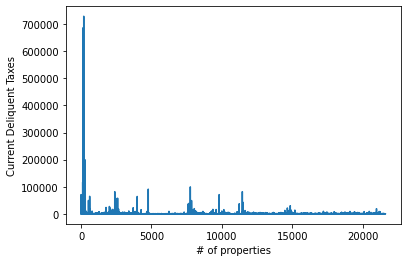

In [ ]:
df.Curr_Dlq_Tax.plot(xlabel='# of properties',ylabel='Current Deliquent Taxes')

852


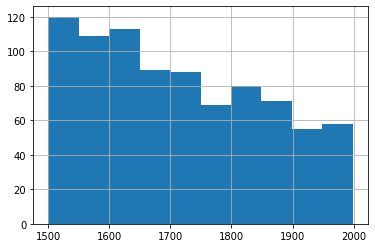

In [ ]:
# subset = df[df.Curr_Dlq_Tax > 2000]
# subset = subset[subset.Curr_Dlq_Tax < 8000]
# print(len(subset))
# subset.head()

# now do 1500-2000
subset = df[df.Curr_Dlq_Tax > 1500]
subset = subset[subset.Curr_Dlq_Tax < 2000]
print(len(subset))


# min 9000-10000 250000 for dlq tax

# market value 150000-350000
#subset.Curr_Dlq_Tax.plot(xlabel='# of properties',ylabel='Current Deliquent Taxes')
subset.Curr_Dlq_Tax.hist()

In [ ]:
subset[0:9]

,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty
28,0001M00055000100,FORT PITT ASSOCIATES LP,414 1ST AVE,1818.70,1205.16,80.35
32,0002G0002500,WILLIAMS SAL & IRENE (W),1108 5TH AVE,1835.14,1824.08,121.61
33,0002G0002600,WILLIAMS SAL & IRENE (W),1108 5TH AVE,1870.57,0.00,0.00
58,0011E0000900,WILLIAMS SAL,1712 5TH AVE,1606.88,0.00,0.00
91,0011J0027300,RENNER RENEE,1830 LOCUST ST,1763.91,5259.87,891.23
119,0001C01661A5700,FREEDOM NOW HOME CARE LLC,320 FORT DUQUESNE BLVD STE 120,1588.62,0.00,0.00
127,0001C01662018100,ANTONUCCI JOHN,320 FORT DUQUESNE BLVD UNIT 18-A,1974.96,0.00,0.00
130,0001C01662041000,ZENG XIAOSI,320 FORT DUQUESNE BLVD UNIT 4-J,1752.96,0.00,0.00
132,0001C01662101400,CAMINITE DENISE,320 FORT DUQUESNE BLVD UNIT 10-N,1668.97,0.00,0.00


In [ ]:
subset.to_csv('taxdlq_subset.csv')

In [ ]:
# questions
# residential or just commercial?
# what type of debt numbers do we want?
# what info do we want from the allegheny website?
# MLS login info

In [ ]:
# import new csv instead of rerunning entire notebook
import pandas as pd
import numpy as np
from google.colab import files

upload = files.upload()

Saving search_allegheny_8000to100000.csv to search_allegheny_8000to100000.csv


In [ ]:
results = pd.read_csv('search_allegheny_8000to100000.csv',index_col=0)
print(results.shape)
results.head()

(171, 14)


,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty,2020_Status,2020_TtlTaxDue,Mkt_Value,Yrs_Unpaid,Type,Use,Yr_Bought,Owner_Code
1,0001C00228000200,TOWN DEVELOPMENT INC,424 STANWIX ST,10290.69,14443.62,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,0001D0011700,502-510 LIBERTY AVE LP,502 LIBERTY AVE,23281.50,0.00,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
5,0001G0015100,PITTSBURGH PRESS BUILDING ASSOCIATES LP,34 BLVD OF THE ALLIES,71214.00,0.00,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
19,0001M0000400,CROWDAMERICA FORT PITT LLC,227 FORT PITT BLVD,9225.68,0.00,0.0,BALANCE DUE,"$1,480.97","$1,319,800",2,Commercial,OFFICE-ELEVATOR -3 + STORIES,2/17/2016,Corporation
25,0001M0004100,FORT PITT ASSOCIATES LP,418 1ST AVE,9575.54,6345.24,423.0,UNPAID,"$2,480.41","$524,400",2,Commercial,OFFICE/WAREHOUSE,5/1/2014,Corporation


In [ ]:
results_sub = results[results['2020_Status'].notnull()]
print(results_sub.shape)
results_sub.head()

(39, 14)


,ID,Owner,Address,Curr_Dlq_Tax,Prior_Dlq_Tax,Prior_Dlq_Pnlty,2020_Status,2020_TtlTaxDue,Mkt_Value,Yrs_Unpaid,Type,Use,Yr_Bought,Owner_Code
19,0001M0000400,CROWDAMERICA FORT PITT LLC,227 FORT PITT BLVD,9225.68,0.00,0.00,BALANCE DUE,"$1,480.97","$1,319,800",2,Commercial,OFFICE-ELEVATOR -3 + STORIES,2/17/2016,Corporation
25,0001M0004100,FORT PITT ASSOCIATES LP,418 1ST AVE,9575.54,6345.24,423.00,UNPAID,"$2,480.41","$524,400",2,Commercial,OFFICE/WAREHOUSE,5/1/2014,Corporation
26,0001M0005200,422 FIRST AVE LP ETAL,432 1ST AVE,15815.00,30239.72,4556.79,UNPAID,"$9,583.45","$2,026,100",2,Commercial,RETL/APT'S OVER,3/29/2013,Corporation
53,0002J0023400,TERIS PETER J & PAULA BABAC (W),546 2ND AVE,18742.06,0.00,0.00,BALANCE DUE,"$2,427.43","$1,026,400",2,Commercial,PARKING GARAGE/LOTS,10/30/2008,Regular
188,0009N0015800,PENN AVE RENAISSANCE III LP,907 PENN AVE,27658.03,17720.38,1181.38,UNPAID,"$8,372.76","$1,770,140",2,Commercial,RETL/APT'S OVER,8/30/2011,Corporation


In [ ]:
print(results_sub.Type.value_counts(),'\n')
print(results_sub.Owner_Code.value_counts(),'\n')
results_sub.Yrs_Unpaid.value_counts()

Commercial     22
Industrial      9
Residential     6
Government      1
Other           1
Name: Type, dtype: int64 

Corporation    27
Regular        12
Name: Owner_Code, dtype: int64 



2    21
4     9
3     9
Name: Yrs_Unpaid, dtype: int64

In [ ]:
results_sub['Mkt_Value'] = results_sub['Mkt_Value'].replace('\$|,', '', regex=True)
results_sub['Mkt_Value'] = pd.to_numeric(results_sub['Mkt_Value'])

results_sub.Mkt_Value.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


500000     2
450000     2
3897400    1
770000     1
865300     1
500800     1
780500     1
821600     1
621900     1
498900     1
930200     1
472100     1
2021000    1
522900     1
1403500    1
871300     1
694900     1
446200     1
494700     1
1357500    1
680000     1
1319800    1
634500     1
2026100    1
631900     1
524400     1
892400     1
610800     1
729900     1
2054100    1
643300     1
679000     1
3523300    1
1026400    1
1060000    1
1770140    1
5000000    1
Name: Mkt_Value, dtype: int64

In [ ]:
results_sub.Mkt_Value.min()

446200